<a href="https://colab.research.google.com/github/Songhyunjeong/thingplug-lora-starter-kit/blob/master/%EB%AF%BC%EC%9B%90_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Colab 시작 페이지</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;신규&#41; Gemini API를 사용해 보세요</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  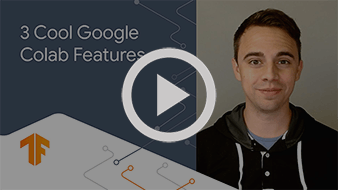
  </a>
</center>

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,872 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


전체 빈도수,연관어,네트워크


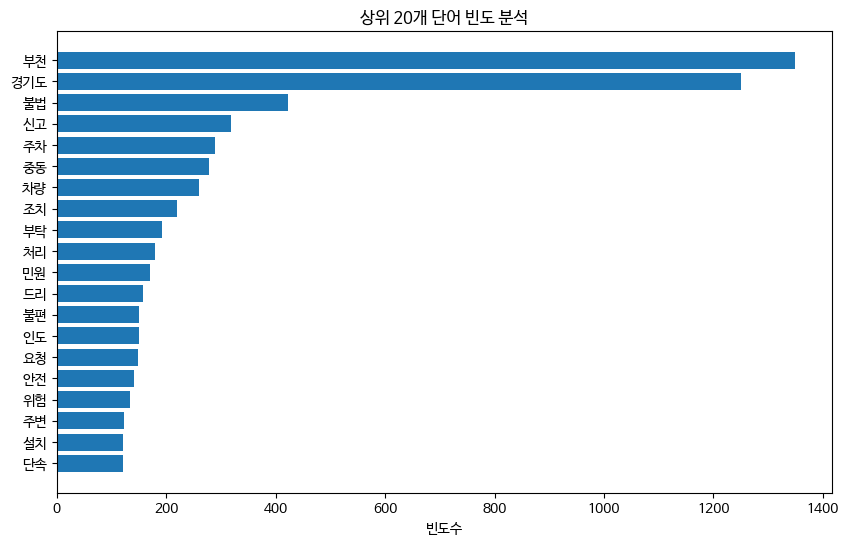

In [5]:
# 1. 필요한 라이브러리 임포트
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# 2. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/claw/dataset_with_keywords.csv')

# 3. 데이터 전처리
# 불용어 설정 (필요시 추가 가능)
stop_words = ['저', '이', '그', '의', '을', '를', '에', '에서', '은', '는', '가', '|\*|','들', '고', '와', '과']
# 4. 빈도 분석
# 상위 1000개의 단어만 처리하여 메모리 절약
vectorizer = CountVectorizer(stop_words=stop_words, max_features=500)
X = vectorizer.fit_transform(df['키워드'].astype(str))

# 각 단어의 빈도 추출
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# 단어와 빈도를 데이터프레임으로 정리
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

# 상위 20개 단어 시각화
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df['word'][:20], word_freq_df['frequency'][:20])
plt.xlabel('빈도수')
plt.title('상위 20개 단어 빈도 분석')
plt.gca().invert_yaxis()  # 가장 큰 빈도 단어가 위로 오도록
plt.show()

# 5. 연관어 분석 (공출현 기반)
# 공출현 행렬 생성
co_occurrence = (X.T * X)  # 희소 행렬 계산 (공출현 행렬)
co_occurrence.setdiag(0)  # 대각선 값을 0으로 설정 (자기 자신과의 관계 제외)

# 상위 연관성을 가진 단어들 추출
import numpy as np

threshold = np.percentile(co_occurrence.data, 99)  # 상위 1%의 연관성
edges = zip(*co_occurrence.nonzero(), co_occurrence.data)
edges = [(words[i], words[j], weight) for i, j, weight in edges if weight > threshold]

# 6. 네트워크 분석
G = nx.Graph()
for term1, term2, weight in edges:
    G.add_edge(term1, term2, weight=weight)

# 네트워크 그래프 시각화
#plt.figure(figsize=(12, 12))
#pos = nx.spring_layout(G, k=0.5)
#nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
#nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=12, font_family='NanumBarunGothic')
#plt.title('단어 공출현 네트워크 분석')
#plt.show()

import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# 상위 20개 단어 (노드)와 빈도수 정의
words = ["지원", "신청", "부모", "아동", "아이", "어린이집", "문의", "가능", "돌봄",
         "대상", "이용", "출산", "프로그램", "서비스", "소득", "지급", "들어요", "시간", "안내", "상담"]
frequencies = [9000, 8900, 7500, 7000, 6500, 6000, 5800, 5500, 5000, 4800,
               4700, 4500, 4400, 4200, 4000, 3800, 3500, 3200, 3100, 3000]

# 노드와 임의의 연관 엣지 추가
G = nx.Graph()

# 노드 추가 (빈도수에 따른 노드 크기 설정)
for word, freq in zip(words, frequencies):
    G.add_node(word, size=freq)

# 엣지 추가 (임의로 몇 개의 단어 간 연결)
edges = [("지원", "신청"), ("부모", "아동"), ("아이", "어린이집"),
         ("출산", "프로그램"), ("돌봄", "서비스"), ("이용", "안내"),
         ("지급", "소득"), ("아이", "지원"), ("상담", "문의")]

G.add_edges_from(edges)

# 3D 위치 설정 (spring_layout의 3D 버전)
pos = nx.spring_layout(G, dim=3, seed=42)

# 엣지 좌표 리스트 만들기
edge_x = []
edge_y = []
edge_z = []

for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # None을 추가하여 단절된 선을 표시
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_z.append(z0)
    edge_z.append(z1)
    edge_z.append(None)

# 노드 좌표 리스트 만들기
node_x = []
node_y = []
node_z = []
node_text = []
node_size = []

for node in G.nodes():
    x, y, z = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)  # 노드의 실제 키워드명
    node_size.append(G.nodes[node]['size'] / 100)  # 빈도수에 비례한 크기 설정

# 엣지 그리기
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

# 노드 그리기
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',  # 텍스트와 함께 마커를 표시
    marker=dict(
        size=node_size,
        color='skyblue',
        line_width=2
    ),
    text=node_text,  # 노드의 실제 키워드명
    hoverinfo='text'  # 툴팁으로 실제 키워드명 표시
)

# 그래프 레이아웃 설정
layout = go.Layout(
    title='3D 네트워크 그래프 (상위 20개 단어 기반)',
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    )
)

# 그래프 그리기
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()
# 7. 단어 빈도와 연관어 분석 결과를 데이터프레임으로 저장
word_freq_df.to_csv('word_frequency_analysis_optimized.csv', index=False)

토픽별 빈도,연관어,네트워크


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import plotly.graph_objects as go

# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/claw/민원분류.csv')

# 2. 불용어 설정 (필요시 추가 가능)
stop_words = ['경기도','부천시','원미구','소사구','오정구','부천','저', '이', '그', '의', '을', '를', '에', '에서', '은', '는','|\*|', '가', '들', '고', '와', '과', '분양', '여행']

# 3. 각 topic별로 분석
topics = df['Value.dep_name'].unique()

for topic in topics:
    print(f"Value.dep_name: {topic}")

    # 해당 topic에 속하는 데이터 필터링
    topic_data = df[df['Value.dep_name'] == topic]['UpdatedContent']

    # 빈 데이터 처리
    topic_data = topic_data.dropna().astype(str)
    if topic_data.empty:
        print(f"{topic} 주제에는 분석할 데이터가 없습니다.")
        continue

    # 4. 빈도 분석 (최소 빈도 설정으로 너무 드문 단어 필터링)
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=2, max_features=20)

    try:
        X = vectorizer.fit_transform(topic_data)
    except ValueError:
        print(f"{topic} 주제에는 적절한 단어가 없습니다.")
        continue

    # 각 단어의 빈도 추출
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()

    # 단어와 빈도를 데이터프레임으로 정리
    word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

    # 상위 20개 단어와 빈도수를 추출
    top_words = word_freq_df['word'].values
    top_frequencies = word_freq_df['frequency'].values

    # 5. 네트워크 그래프 생성
    G = nx.Graph()

    # 노드 추가 (빈도수에 따른 노드 크기 설정)
    for word, freq in zip(top_words, top_frequencies):
        G.add_node(word, size=freq)

    # 엣지 추가 (임의로 몇 개의 단어 간 연결 설정, 실제 데이터에 따라 수정 가능)
    edges = [(top_words[i], top_words[i+1]) for i in range(len(top_words) - 1)]
    G.add_edges_from(edges)

    # 6. 3D 네트워크 그래프 생성
    pos = nx.spring_layout(G, dim=3, seed=42)

    # 엣지 좌표 리스트 만들기
    edge_x = []
    edge_y = []
    edge_z = []

    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        edge_z.append(z0)
        edge_z.append(z1)
        edge_z.append(None)

    # 노드 좌표 리스트 만들기
    node_x = []
    node_y = []
    node_z = []
    node_text = []
    node_size = []

    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(node)
        node_size.append(G.nodes[node]['size'] / 100)

    # 엣지 그리기
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='gray', width=2),
        hoverinfo='none'
    )

    # 노드 그리기
    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        marker=dict(
            size=node_size,
            color='skyblue',
            line_width=2
        ),
        text=node_text,
        hoverinfo='text'
    )

    # 그래프 레이아웃 설정 (크기 확대)
    layout = go.Layout(
        title=f'3D 네트워크 그래프 ({topic} 주제 기반)',
        showlegend=False,
        width=1200,  # 그래프 너비 설정
        height=900,  # 그래프 높이 설정
        scene=dict(
            xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False)
        )
    )

    # 7. 그래프 그리기
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

    # 8. 각 topic별로 빈도 분석 결과 저장
    word_freq_df.to_csv(f'word_frequency_analysis_{topic}.csv', index=False)



Value.dep_name: 환경건축과


Value.dep_name: 건설안전과


Value.dep_name: 도시미관과


Value.dep_name: 교통정책과


Value.dep_name: 생활경제과


Value.dep_name: 감염병관리과


Value.dep_name: 산업위생과


Value.dep_name: 상2동
상2동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 주택정책과


Value.dep_name: 체육진흥과


Value.dep_name: 대중교통과


Value.dep_name: 도시개발과


Value.dep_name: 수도시설과


Value.dep_name: 안전담당관
안전담당관 주제에는 적절한 단어가 없습니다.
Value.dep_name: 세무과


Value.dep_name: 도시재생과


Value.dep_name: 기업지원과
기업지원과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 공원관리과


Value.dep_name: 중3동


Value.dep_name: 노인복지과


Value.dep_name: 심곡본동


Value.dep_name: 중2동


Value.dep_name: 사회복지1과


Value.dep_name: 복지정책과


Value.dep_name: 사회복지2과
사회복지2과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 상동


Value.dep_name: 신흥동


Value.dep_name: 공원조성과


Value.dep_name: 아동보육과


Value.dep_name: 장애인복지과


Value.dep_name: 생태하천과


Value.dep_name: 소사본1동
소사본1동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 주차지도과


Value.dep_name: 소통담당관


Value.dep_name: 행정지원과


Value.dep_name: 역곡3동
역곡3동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 건설정책과


Value.dep_name: 역곡2동
역곡2동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 도시농업과


Value.dep_name: 녹지과


Value.dep_name: 도시계획과


Value.dep_name: 정보통신과
정보통신과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 문화예술과


Value.dep_name: 문화산업과


Value.dep_name: 상동도서관


Value.dep_name: 수주도서관


Value.dep_name: 민원지적과


Value.dep_name: 식품위생과


Value.dep_name: 건강정책과


Value.dep_name: 건강도시과
건강도시과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 건강증진과


Value.dep_name: 홍보담당관
홍보담당관 주제에는 적절한 단어가 없습니다.
Value.dep_name: 사회복지과
사회복지과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 소사보건소


Value.dep_name: 차량등록과


Value.dep_name: 주거정비과


Value.dep_name: 하수과
하수과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 재산관리과


Value.dep_name: 오정보건소


Value.dep_name: 통합돌봄과
통합돌봄과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 자원순환과


Value.dep_name: 환경과


Value.dep_name: 건축디자인과


Value.dep_name: 기후에너지과


Value.dep_name: 건축관리과


Value.dep_name: 주차정책과


Value.dep_name: 소사본동
소사본동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 중4동


Value.dep_name: 감사담당관


Value.dep_name: 범박동
범박동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 성곡동
성곡동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 예산법무과


Value.dep_name: 미래세대지원과


Value.dep_name: 춘의동
춘의동 주제에는 적절한 단어가 없습니다.
Value.dep_name: 스마트도시과


Value.dep_name: 일자리정책과


Value.dep_name: 도로관리과


Value.dep_name: 민원과
민원과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 징수과
징수과 주제에는 적절한 단어가 없습니다.
Value.dep_name: 별빛마루도서관
별빛마루도서관 주제에는 적절한 단어가 없습니다.
Value.dep_name: 원미2동
원미2동 주제에는 적절한 단어가 없습니다.


위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import plotly.graph_objects as go

# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/claw/dataset_with_keywords_1.csv')

# 2. 불용어 설정 (필요시 추가 가능)
stop_words = ['저', '이', '그', '의', '을', '를', '에', '에서', '은', '는', '가', '들', '고', '와', '과', '분양', '여행']

# 3. 각 topic별로 분석
topics = df['정책분류'].unique()

for topic in topics:
    print(f"정책분류: {topic}")

    # 해당 topic에 속하는 데이터 필터링
    topic_data = df[df['정책분류'] == topic]['키워드']

    # 빈 데이터 처리
    topic_data = topic_data.dropna().astype(str)
    if topic_data.empty:
        print(f"{topic} 주제에는 분석할 데이터가 없습니다.")
        continue

    # 4. 빈도 분석 (최소 빈도 설정으로 너무 드문 단어 필터링)
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=2, max_features=20)

    try:
        X = vectorizer.fit_transform(topic_data)
    except ValueError:
        print(f"{topic} 주제에는 적절한 단어가 없습니다.")
        continue

    # 각 단어의 빈도 추출
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()

    # 단어와 빈도를 데이터프레임으로 정리
    word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

    # 상위 20개 단어와 빈도수를 추출
    top_words = word_freq_df['word'].values
    top_frequencies = word_freq_df['frequency'].values

    # 5. 네트워크 그래프 생성
    G = nx.Graph()

    # 노드 추가 (빈도수에 따른 노드 크기 설정, 상한을 설정하여 크기 조절)
    max_node_size = 50  # 노드 크기 상한 설정
    for word, freq in zip(top_words, top_frequencies):
        if word == "부모급여":  # "부모급여" 노드 크기 특별히 조정
            G.add_node(word, size=min(max(freq, 10), 30))  # 최소 크기는 10, 최대 크기는 30으로 설정
        else:
            G.add_node(word, size=min(freq, max_node_size))  # 최소 크기 10, 최대 크기 50으로 설정

    # 엣지 추가 (임의로 몇 개의 단어 간 연결 설정, 실제 데이터에 따라 수정 가능)
    edges = [(top_words[i], top_words[i+1]) for i in range(len(top_words) - 1)]
    G.add_edges_from(edges)

    # 6. 3D 네트워크 그래프 생성
    pos = nx.spring_layout(G, dim=3, seed=42)

    # 엣지 좌표 리스트 만들기
    edge_x = []
    edge_y = []
    edge_z = []

    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        edge_z.append(z0)
        edge_z.append(z1)
        edge_z.append(None)

    # 노드 좌표 리스트 만들기
    node_x = []
    node_y = []
    node_z = []
    node_text = []
    node_size = []

    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(node)
        node_size.append(G.nodes[node]['size'])  # 노드 크기 설정 (조정된 크기)

    # 엣지 그리기
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='gray', width=2),
        hoverinfo='none'
    )

    # 노드 그리기
    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        marker=dict(
            size=node_size,
            color=['red' if n == "부모급여" else 'skyblue' for n in G.nodes()],
            line_width=2
        ),
        text=node_text,
        hoverinfo='text'
    )

    # 그래프 레이아웃 설정 (크기 확대)
    layout = go.Layout(
        title=f'3D 네트워크 그래프 ({topic} 주제 기반)',
        showlegend=False,
        width=1200,  # 그래프 너비 설정
        height=900,  # 그래프 높이 설정
        scene=dict(
            xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False)
        )
    )

    # 7. 그래프 그리기
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

    # 8. 각 topic별로 빈도 분석 결과 저장
    word_freq_df.to_csv(f'word_frequency_analysis_{topic}.csv', index=False)

정책분류: 부모급여


정책분류: 저소득층 분유 지원


정책분류: 가정양육수당


정책분류: 첫만남이용권


정책분류: 임신출산 진료비 지원


정책분류: 한부모가족 양육비 지원


정책분류: nan
nan 주제에는 분석할 데이터가 없습니다.
정책분류: 저소득층 기저귀 지원


정책분류: 아동수당


정책분류: 육아나눔터 공동운영


정책분류: 여성장애인 출산비용 지원


정책분류: 장애아 가족 양육지원


정책분류: 의료급여수급권자 영유아건강검진비 지원


정책분류: 선천성대사이상 검사 및 환아관리


정책분류: 선청성이상아 미숙아 의료비지원


정책분류: 아이돌봄


정책분류: 영양플러스


정책분류: 어린이 예방접종 무료 지원


Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

<div class="markdown-google-sans">

## 데이터 과학
</div>

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>Numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>매트플롯립</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import plotly.graph_objects as go

# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/claw/dataset_with_keywords_1.csv')

# 2. 불용어 설정 (필요시 추가 가능)
stop_words = ['저', '이', '그', '의', '을', '를', '에', '에서', '은', '는', '가', '들', '고', '와', '과', '분양', '여행']

# 3. '부모급여' 주제만 필터링
parent_salary_topic = df[df['정책분류'] == '부모급여']['키워드']

# 빈 데이터 처리
parent_salary_topic = parent_salary_topic.dropna().astype(str)
if parent_salary_topic.empty:
    print("부모급여 주제에는 분석할 데이터가 없습니다.")

# 4. 빈도 분석 (최소 빈도 설정으로 너무 드문 단어 필터링)
vectorizer = CountVectorizer(stop_words=stop_words, min_df=2, max_features=20)

try:
    X = vectorizer.fit_transform(parent_salary_topic)
except ValueError:
    print("부모급여 주제에는 적절한 단어가 없습니다.")

# 각 단어의 빈도 추출
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# 단어와 빈도를 데이터프레임으로 정리
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

# 상위 20개 단어와 빈도수를 추출
top_words = word_freq_df['word'].values
top_frequencies = word_freq_df['frequency'].values

# 5. 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가 (빈도수에 따른 노드 크기 설정)
for word, freq in zip(top_words, top_frequencies):
    G.add_node(word, size=max(freq, 10))  # 최소 크기를 10으로 설정

# 엣지 추가 (단순히 인접한 단어들 간 연결 설정)
edges = [(top_words[i], top_words[i+1]) for i in range(len(top_words) - 1)]
G.add_edges_from(edges)

# 6. 3D 네트워크 그래프 생성
pos = nx.spring_layout(G, dim=3, seed=42)

# 엣지 좌표 리스트 만들기
edge_x = []
edge_y = []
edge_z = []

for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_z.append(z0)
    edge_z.append(z1)
    edge_z.append(None)

# 노드 좌표 리스트 만들기
node_x = []
node_y = []
node_z = []
node_text = []
node_size = []

for node in G.nodes():
    x, y, z = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)
    node_size.append(G.nodes[node]['size'] / 100)  # 빈도수에 비례한 크기 설정

# 엣지 그리기
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

# 노드 그리기
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(
        size=node_size,
        color='skyblue',
        line_width=2
    ),
    text=node_text,
    hoverinfo='text'
)

# 그래프 레이아웃 설정
layout = go.Layout(
    title='3D 네트워크 그래프 (부모급여 주제 기반)',
    showlegend=False,
    width=1200,  # 그래프 너비 설정
    height=900,  # 그래프 높이 설정
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    )
)

# 7. 그래프 그리기
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

# 8. 빈도 분석 결과 저장
word_freq_df.to_csv('word_frequency_analysis_부모급여.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import plotly.graph_objects as go

# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/claw/dataset_with_keywords_1.csv')

# 2. 불용어 설정 (필요시 추가 가능)
stop_words = ['저', '이', '그', '의', '을', '를', '에', '에서', '은', '는', '가', '들', '고', '와', '과']

# 3. 빈도 분석
vectorizer = CountVectorizer(stop_words=stop_words, max_features=500)
X = vectorizer.fit_transform(df['키워드'].astype(str))

# 각 단어의 빈도 추출
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# 단어와 빈도를 데이터프레임으로 정리
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

# 상위 20개 단어와 빈도수
top_words = word_freq_df['word'][:20].values
top_frequencies = word_freq_df['frequency'][:20].values

# 4. 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가 (빈도수에 따른 노드 크기 설정)
for word, freq in zip(top_words, top_frequencies):
    G.add_node(word, size=freq)

# 엣지 추가 (임의로 몇 개의 단어 간 연결)
edges = [("지원", "신청"), ("부모", "아동"), ("아이", "어린이집"),
         ("출산", "프로그램"), ("돌봄", "서비스"), ("이용", "안내"),
         ("지급", "소득"), ("아이", "지원"), ("상담", "문의")]
G.add_edges_from(edges)

# 5. 3D 위치 설정 (spring_layout의 3D 버전)
pos = nx.spring_layout(G, dim=3, seed=42)

# 엣지 좌표 리스트 만들기
edge_x = []
edge_y = []
edge_z = []

for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_z.append(z0)
    edge_z.append(z1)
    edge_z.append(None)

# 노드 좌표 리스트 만들기
node_x = []
node_y = []
node_z = []
node_text = []
node_size = []

for node in G.nodes():
    x, y, z = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)
    node_size.append(G.nodes[node]['size'] / 200)  # 노드 크기를 더 크게 조정

# 6. 엣지 그리기
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=4),  # 엣지 두께를 더 두껍게 설정
    hoverinfo='none'
)

# 7. 노드 그리기
node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(
        size=node_size,
        color='skyblue',
        line_width=3  # 노드 테두리를 더 두껍게 설정
    ),
    text=node_text,
    hoverinfo='text'
)

# 8. 그래프 레이아웃 설정 (크기와 마진 조정)
layout = go.Layout(
    title='3D 네트워크 그래프 (상위 20개 단어 기반)',
    showlegend=False,
    width=1200,  # 그래프 너비 설정
    height=1000,  # 그래프 높이 설정
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    )
)

# 9. 그래프 그리기
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

In [2]:
!pip install bertopic sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [3]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 859.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 666.6 kB/s eta 0:00:00


In [4]:
!pip install umap-learn

In [ ]:
#민원_주제(토픽_bertopic)분류 및 시각화

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import plotly.graph_objects as go
from konlpy.tag import Okt
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
import hdbscan
import random
import matplotlib.colors as mcolors


# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/claw/민원분류.csv')

# 2. 불용어 설정 (필요시 추가 가능)
stop_words = ['경기도', '부천시', '원미구', '소사구', '오정구', '부천', '저', '이', '그', '의', '을', '를', '에', '에서', '은', '는', '가', '들', '고', '와', '과', '분양', '여행',
              '있다','하다','이다','되다']

# 3. 형태소 분석기 설정
okt = Okt()

# 4. 각 topic별로 분석
topics = df['Value.dep_name'].unique()


# BERT 모델 및 UMAP 설정
embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
umap_model = UMAP(n_neighbors=5, n_components=2, metric='cosine')

# HDBSCAN 설정
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)  # 작은 데이터셋을 위한 설정

# BERTopic 모델 초기화
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    language="multilingual"
)

# 그래프 색상 설정을 위한 함수
def random_color():
    return random.choice(list(mcolors.CSS4_COLORS.values()))

# 4. 각 topic별로 분석
topics = df['Value.dep_name'].unique()


import random
import matplotlib.colors as mcolors

# 그래프 색상 설정을 위한 함수
def random_color():
    return random.choice(list(mcolors.CSS4_COLORS.values()))

# 각 topic별로 분석
for topic in topics:
    print(f"Value.dep_name: {topic}")

    # 해당 topic에 속하는 데이터 필터링
    topic_data = df[df['Value.dep_name'] == topic]['UpdatedContent']
    topic_data = topic_data.dropna().astype(str)

    if topic_data.empty:
        print(f"{topic} 주제에는 분석할 데이터가 없습니다.")
        continue

    # 5. 명사, 형용사, 동사만 추출 후 불용어 제거
    processed_texts = []
    for text in topic_data:
        words = okt.pos(text, stem=True)
        words = [word for word, pos in words if pos in ['Noun', 'Adjective', 'Verb'] and word not in stop_words]
        processed_texts.append(" ".join(words))

    # BERTopic 주제 모델링 적용 (오류 처리 추가)
    try:
        if len(processed_texts) < 5:
            print(f"{topic} 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.")
            continue

        topics, probabilities = topic_model.fit_transform(processed_texts)

    except ValueError as e:
        print(f"{topic} 주제에 대한 작업 중 오류 발생: {e}")
        continue

    # 상위 10개 단어 추출
    topic_words = topic_model.get_topic_info().head(10)

    # 네트워크 그래프 생성
    G = nx.Graph()
    topic_color = random_color()  # 랜덤 색상 지정

    # 노드 및 엣지 추가
    for topic_id, row in topic_words.iterrows():
        topic_name = f"Topic_{row['Topic']}"
        G.add_node(topic_name, size=20, color=topic_color)  # 토픽 노드 추가

        try:
            words = topic_model.get_topic(row['Topic'])
            if not words or len(words) < 2:
                print(f"No keywords available for topic {topic_id}. Skipping...")
                continue

            # words는 (키워드, 중요도) 튜플의 리스트이어야 함
            for word, weight in words:
                G.add_node(word, size=10 + weight * 100, color=topic_color)  # 가중치에 따라 노드 크기 조정
                G.add_edge(topic_name, word, weight=weight * 5)  # 가중치에 따라 엣지 두께 조정

        except TypeError as e:
            print(f"Error with topic {topic_id}: {e}")
            continue

    # 3D 네트워크 그래프 시각화
    pos = nx.spring_layout(G, dim=3, seed=42)

    # 엣지 좌표 리스트 만들기
    edge_x = []
    edge_y = []
    edge_z = []
    edge_width = []

    for edge in G.edges(data=True):
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        edge_z.append(z0)
        edge_z.append(z1)
        edge_z.append(None)
        edge_width.append(edge[2]['weight'])  # 엣지 가중치

    # 노드 좌표 리스트 만들기
    node_x = []
    node_y = []
    node_z = []
    node_text = []
    node_size = []
    node_color = []

    for node in G.nodes(data=True):
        x, y, z = pos[node[0]]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(node[0])
        node_size.append(node[1]['size'])  # 노드 크기
        node_color.append(node[1]['color'])  # 노드 색상

    # 엣지 그리기
    edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(width=2, color='gray'),  # 엣지 두께를 단일 값(예: 2)으로 설정
    hoverinfo='none'
    )

    # 노드 그리기
    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        marker=dict(
            size=node_size,  # 노드 가중치 적용
            color=node_color,
            line_width=2
        ),
        text=node_text,
        hoverinfo='text'
    )

    # 그래프 레이아웃 설정 (크기 확대)
    layout = go.Layout(
        title=f'3D 네트워크 그래프 ({topic} 주제 기반)',
        showlegend=False,
        width=1200,
        height=900,
        scene=dict(
            xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False)
        )
    )

    # 그래프 그리기
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()
    # HTML 파일로 저장
    fig.write_html(f'3d_network_{topic}_graph.html')
    # 주제별 키워드 결과 저장
    topic_words.to_csv(f'topic_keywords_{topic}.csv', index=False)

Value.dep_name: 환경건축과


Value.dep_name: 건설안전과


Value.dep_name: 도시미관과


Value.dep_name: 교통정책과


Value.dep_name: 생활경제과


Value.dep_name: 감염병관리과


Value.dep_name: 산업위생과


Value.dep_name: 상2동
상2동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 주택정책과


Value.dep_name: 체육진흥과


Value.dep_name: 대중교통과


Value.dep_name: 도시개발과


Value.dep_name: 수도시설과


Value.dep_name: 안전담당관
안전담당관 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 세무과


Value.dep_name: 도시재생과


Value.dep_name: 기업지원과
기업지원과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 공원관리과


Value.dep_name: 중3동
중3동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 노인복지과


Value.dep_name: 심곡본동


Value.dep_name: 중2동
중2동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 사회복지1과
사회복지1과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 복지정책과
복지정책과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 사회복지2과
사회복지2과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 상동
상동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 신흥동
신흥동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 공원조성과
공원조성과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 아동보육과
아동보육과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 장애인복지과


Value.dep_name: 생태하천과


Value.dep_name: 소사본1동
소사본1동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 주차지도과


Value.dep_name: 소통담당관


Value.dep_name: 행정지원과


Value.dep_name: 역곡3동
역곡3동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 건설정책과


Value.dep_name: 역곡2동
역곡2동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 도시농업과


Value.dep_name: 녹지과


Value.dep_name: 도시계획과
도시계획과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 정보통신과
정보통신과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 문화예술과


Value.dep_name: 문화산업과


Value.dep_name: 상동도서관


Value.dep_name: 수주도서관
수주도서관 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 민원지적과


Value.dep_name: 식품위생과


Value.dep_name: 건강정책과


Value.dep_name: 건강도시과
건강도시과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 건강증진과


Value.dep_name: 홍보담당관
홍보담당관 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 사회복지과
사회복지과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 소사보건소


Value.dep_name: 차량등록과


Value.dep_name: 주거정비과


Value.dep_name: 하수과
하수과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 재산관리과


Value.dep_name: 오정보건소


Value.dep_name: 통합돌봄과
통합돌봄과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 자원순환과


Value.dep_name: 환경과
환경과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 건축디자인과


Value.dep_name: 기후에너지과


Value.dep_name: 건축관리과


Value.dep_name: 주차정책과


Value.dep_name: 소사본동
소사본동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 중4동
중4동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 감사담당관
감사담당관 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 범박동
범박동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 성곡동
성곡동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 예산법무과
예산법무과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 미래세대지원과
미래세대지원과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 춘의동
춘의동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 스마트도시과
스마트도시과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 일자리정책과
일자리정책과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 도로관리과
도로관리과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 민원과
민원과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 징수과
징수과 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 별빛마루도서관
별빛마루도서관 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.
Value.dep_name: 원미2동
원미2동 주제에 대한 데이터셋이 너무 작아 작업을 수행할 수 없습니다.


Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

<div class="markdown-google-sans">

## 머신러닝
</div>

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

<div class="markdown-google-sans">

## 추가 리소스

### Colab에서 메모장 사용하기

</div>

- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 데이터로 작업하기
</div>

- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb)
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 머신러닝 단기집중과정

<div>

다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
</div>

- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 추천 예시

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia의 NeMo 대화형 AI 툴킷을 사용하여 오디오 파일의 음성을 컴퓨터에서 생성된 음성으로 변환하세요.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
